# Blue Jay Species Classifier

Five breeds of blue jays are commonly found in North America:
<ol>
<li>Blue Jays</li>
    <dt><img align="left" src="images/lesson1_mini_sideproject/blue_jay.jpg" alt="blue jay" width="200"/></dt>
    <br><br><br><br><br><br><br><br>
    <dt><font size="-2">Credit: <a href="https://macaulaylibrary.org/asset/47351251">bellemare celine</a></font></dt>
    <br>
<li>Steller's Jays</li>
    <dt><img align="left" src="images/lesson1_mini_sideproject/stellers_jay.jpg" alt="stellers jay" width="200"/></dt>
    <br><br><br><br><br><br><br><br>
    <dt><font size="-2">Credit: <a href="https://macaulaylibrary.org/asset/60478861">Jeff Maw</a></font></dt>
    <br>
<li>California Scrub-Jays</li>
    <dt><img align="left" src="images/lesson1_mini_sideproject/california_scrub_jay.jpg" alt="california scrub jay" width="200"/></dt>
    <br><br><br><br><br><br><br><br>
    <dt><font size="-2">Credit: <a href="https://macaulaylibrary.org/asset/60701841">Nancy Christensen</a></font></dt>
    <br>
<li>Florida Scrub-Jays</li>
    <dt><img align="left" src="images/lesson1_mini_sideproject/florida_scrub_jay.jpg" alt="florida scrub jay" width="200"/></dt>
    <br><br><br><br><br><br><br><br>
    <dt><font size="-2">Credit: <a href="https://macaulaylibrary.org/asset/49064531">Patrick J. Blake</a></font></dt>
    <br>
<li>Woodhouse's Scrub-Jays</li>
    <dt><img align="left" src="images/lesson1_mini_sideproject/woodhouses_scrub_jay.jpg" alt="woodhouse's scrub jay" width="200"/></dt>
    <br><br><br><br><br><br><br><br>
    <dt><font size="-2">Credit: <a href="https://macaulaylibrary.org/asset/31638561">Chris Wood</a></font></dt>
    <br>
</ol>

It can sometimes be tricky for amateur birdwatchers to tell the difference between certain species of birds. 

For example, believe it or not, these two jays *aren't* of the same species:

<img align="left" src="images/lesson1_mini_sideproject/california.jpg" alt="california" width="200"/><img align="center" src="images/lesson1_mini_sideproject/woodhouses.jpg" alt="woodhouses" width="200"/>
<br><br>
The bird on the left is known as a [California Scrub-Jay](https://www.allaboutbirds.org/guide/California_Scrub-Jay/overview) (credit: [Margaret Kunes](https://macaulaylibrary.org/asset/34824751)), while the one on the right is a [Woodhouse's Scrub-Jay](https://www.allaboutbirds.org/guide/Woodhouses_Scrub-Jay/overview) (credit: [Adit N](https://macaulaylibrary.org/asset/104055021)).

I wanted to see if could train a deep learning network to recognize the differences between these similar-appearing yet different species of blue jays. What's more, I wanted to see if it was possible to accomplish this (get an error rate below 10.0%) using as small a dataset, and in as short a time, as possible.

#### References

Cornell University's [Macaulay Library](https://www.macaulaylibrary.org/) is the source of the above photos. All 500 photos used in this notebook's dataset were downloaded from [this](https://search.macaulaylibrary.org/catalog?taxonCode=blujay&yr=YCUSTOM&mediaType=p&sort=rating_rank_desc&ey=2015&by=2015&q=Blue%20Jay%20-%20Cyanocitta%20cristata) portal. 

The library's [terms of service](https://www.macaulaylibrary.org/macaulay-library-terms-of-use/#_ga=2.190700515.959636602.1540573969-650150169.1540573969) allow use all photos for educational and research purposes, as long as the library is properly cited as the source.

Moreover, these [five .CSV files](/data/lesson1_mini_sideproject) containing the metadata/authorship info for each photo that was used. 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Get nicer looking graphs for retina displays
%config InlineBackend.figure_format = 'retina'

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path

## Dataset Creation

In [30]:
# Slightly adapted from Francisco Ingham:
# https://github.com/lesscomfortable/google-image-dataset/blob/master/create_dataset.ipynb

def download_images(urls, dest, max_pics=1000):
    "Download images listed in text file `urls` to path `dest`, at most `max_pics`"
    # urls = open(urls).read().strip().split("\n")
    dest = Path(dest)
    dest.mkdir(exist_ok=True)

    for i,url in enumerate(master_bar(urls)):
        if i >= max_pics:
            print('Max number of images downloaded')
            break
        try: r = download_url(url, dest/f"{i:08d}.jpg", overwrite=True)
        except: print(f"Error downloading {url}...skipping")
        print(dest/f"{i:08d}.jpg")

    for file in os.listdir(dest):
        f_img = dest/file
        try:    assert open_image(f_img).shape[0]==3
        except: f_img.unlink(), f'incorrect image format: {file}'

In [3]:
blue_jay_species = ['blue_jay','california_scrub_jay','florida_scrub_jay','stellers_jay','woodhouses_scrub_jay']

In [32]:
for s in blue_jay_species:
    ims_df = pd.read_csv(f'data/lesson1_mini_sideproject/{s}_ims.csv')
    dest = f'data/lesson1_mini_sideproject/{s}'
    ims_df['dl_url'] = ims_df['ML Catalog #'].apply(lambda x: 'https://download.ams.birds.cornell.edu/api/v1/asset/' + str(x))
    download_images(ims_df['dl_url'], dest, max_pics=100)

data/blue_jay_imgs/blue_jay/00000000.jpg


data/blue_jay_imgs/blue_jay/00000001.jpg


data/blue_jay_imgs/blue_jay/00000002.jpg


data/blue_jay_imgs/blue_jay/00000003.jpg


data/blue_jay_imgs/blue_jay/00000004.jpg


data/blue_jay_imgs/blue_jay/00000005.jpg


data/blue_jay_imgs/blue_jay/00000006.jpg


data/blue_jay_imgs/blue_jay/00000007.jpg


data/blue_jay_imgs/blue_jay/00000008.jpg


data/blue_jay_imgs/blue_jay/00000009.jpg


data/blue_jay_imgs/blue_jay/00000010.jpg


data/blue_jay_imgs/blue_jay/00000011.jpg


data/blue_jay_imgs/blue_jay/00000012.jpg


data/blue_jay_imgs/blue_jay/00000013.jpg


data/blue_jay_imgs/blue_jay/00000014.jpg


data/blue_jay_imgs/blue_jay/00000015.jpg


data/blue_jay_imgs/blue_jay/00000016.jpg


data/blue_jay_imgs/blue_jay/00000017.jpg


data/blue_jay_imgs/blue_jay/00000018.jpg


data/blue_jay_imgs/blue_jay/00000019.jpg


data/blue_jay_imgs/blue_jay/00000020.jpg


data/blue_jay_imgs/blue_jay/00000021.jpg


data/blue_jay_imgs/blue_jay/00000022.jpg


data/blue_jay_imgs/blue_jay/00000023.jpg


data/blue_jay_imgs/blue_jay/00000024.jpg


data/blue_jay_imgs/blue_jay/00000025.jpg


data/blue_jay_imgs/blue_jay/00000026.jpg


data/blue_jay_imgs/blue_jay/00000027.jpg


data/blue_jay_imgs/blue_jay/00000028.jpg


data/blue_jay_imgs/blue_jay/00000029.jpg


data/blue_jay_imgs/blue_jay/00000030.jpg


data/blue_jay_imgs/blue_jay/00000031.jpg


data/blue_jay_imgs/blue_jay/00000032.jpg


data/blue_jay_imgs/blue_jay/00000033.jpg


data/blue_jay_imgs/blue_jay/00000034.jpg


data/blue_jay_imgs/blue_jay/00000035.jpg


data/blue_jay_imgs/blue_jay/00000036.jpg


data/blue_jay_imgs/blue_jay/00000037.jpg


data/blue_jay_imgs/blue_jay/00000038.jpg


data/blue_jay_imgs/blue_jay/00000039.jpg


data/blue_jay_imgs/blue_jay/00000040.jpg


data/blue_jay_imgs/blue_jay/00000041.jpg


data/blue_jay_imgs/blue_jay/00000042.jpg


data/blue_jay_imgs/blue_jay/00000043.jpg


data/blue_jay_imgs/blue_jay/00000044.jpg


data/blue_jay_imgs/blue_jay/00000045.jpg


data/blue_jay_imgs/blue_jay/00000046.jpg


data/blue_jay_imgs/blue_jay/00000047.jpg


data/blue_jay_imgs/blue_jay/00000048.jpg


data/blue_jay_imgs/blue_jay/00000049.jpg


data/blue_jay_imgs/blue_jay/00000050.jpg


data/blue_jay_imgs/blue_jay/00000051.jpg


data/blue_jay_imgs/blue_jay/00000052.jpg


data/blue_jay_imgs/blue_jay/00000053.jpg


data/blue_jay_imgs/blue_jay/00000054.jpg


data/blue_jay_imgs/blue_jay/00000055.jpg


data/blue_jay_imgs/blue_jay/00000056.jpg


data/blue_jay_imgs/blue_jay/00000057.jpg


data/blue_jay_imgs/blue_jay/00000058.jpg


data/blue_jay_imgs/blue_jay/00000059.jpg


data/blue_jay_imgs/blue_jay/00000060.jpg


data/blue_jay_imgs/blue_jay/00000061.jpg


data/blue_jay_imgs/blue_jay/00000062.jpg


data/blue_jay_imgs/blue_jay/00000063.jpg


data/blue_jay_imgs/blue_jay/00000064.jpg


data/blue_jay_imgs/blue_jay/00000065.jpg


data/blue_jay_imgs/blue_jay/00000066.jpg


data/blue_jay_imgs/blue_jay/00000067.jpg


data/blue_jay_imgs/blue_jay/00000068.jpg


data/blue_jay_imgs/blue_jay/00000069.jpg


data/blue_jay_imgs/blue_jay/00000070.jpg


data/blue_jay_imgs/blue_jay/00000071.jpg


data/blue_jay_imgs/blue_jay/00000072.jpg


data/blue_jay_imgs/blue_jay/00000073.jpg


data/blue_jay_imgs/blue_jay/00000074.jpg


data/blue_jay_imgs/blue_jay/00000075.jpg


data/blue_jay_imgs/blue_jay/00000076.jpg


data/blue_jay_imgs/blue_jay/00000077.jpg


data/blue_jay_imgs/blue_jay/00000078.jpg


data/blue_jay_imgs/blue_jay/00000079.jpg


data/blue_jay_imgs/blue_jay/00000080.jpg


data/blue_jay_imgs/blue_jay/00000081.jpg


data/blue_jay_imgs/blue_jay/00000082.jpg


data/blue_jay_imgs/blue_jay/00000083.jpg


data/blue_jay_imgs/blue_jay/00000084.jpg


data/blue_jay_imgs/blue_jay/00000085.jpg


data/blue_jay_imgs/blue_jay/00000086.jpg


data/blue_jay_imgs/blue_jay/00000087.jpg


data/blue_jay_imgs/blue_jay/00000088.jpg


data/blue_jay_imgs/blue_jay/00000089.jpg


data/blue_jay_imgs/blue_jay/00000090.jpg


data/blue_jay_imgs/blue_jay/00000091.jpg


data/blue_jay_imgs/blue_jay/00000092.jpg


data/blue_jay_imgs/blue_jay/00000093.jpg


data/blue_jay_imgs/blue_jay/00000094.jpg


data/blue_jay_imgs/blue_jay/00000095.jpg


data/blue_jay_imgs/blue_jay/00000096.jpg


data/blue_jay_imgs/blue_jay/00000097.jpg


data/blue_jay_imgs/blue_jay/00000098.jpg


data/blue_jay_imgs/blue_jay/00000099.jpg
Total time: 00:41



data/blue_jay_imgs/california_scrub_jay/00000000.jpg


data/blue_jay_imgs/california_scrub_jay/00000001.jpg


data/blue_jay_imgs/california_scrub_jay/00000002.jpg


data/blue_jay_imgs/california_scrub_jay/00000003.jpg


data/blue_jay_imgs/california_scrub_jay/00000004.jpg


data/blue_jay_imgs/california_scrub_jay/00000005.jpg


data/blue_jay_imgs/california_scrub_jay/00000006.jpg


data/blue_jay_imgs/california_scrub_jay/00000007.jpg


data/blue_jay_imgs/california_scrub_jay/00000008.jpg


data/blue_jay_imgs/california_scrub_jay/00000009.jpg


data/blue_jay_imgs/california_scrub_jay/00000010.jpg


data/blue_jay_imgs/california_scrub_jay/00000011.jpg


data/blue_jay_imgs/california_scrub_jay/00000012.jpg


data/blue_jay_imgs/california_scrub_jay/00000013.jpg


data/blue_jay_imgs/california_scrub_jay/00000014.jpg


data/blue_jay_imgs/california_scrub_jay/00000015.jpg


data/blue_jay_imgs/california_scrub_jay/00000016.jpg


data/blue_jay_imgs/california_scrub_jay/00000017.jpg


data/blue_jay_imgs/california_scrub_jay/00000018.jpg


data/blue_jay_imgs/california_scrub_jay/00000019.jpg


data/blue_jay_imgs/california_scrub_jay/00000020.jpg


data/blue_jay_imgs/california_scrub_jay/00000021.jpg


data/blue_jay_imgs/california_scrub_jay/00000022.jpg


data/blue_jay_imgs/california_scrub_jay/00000023.jpg


data/blue_jay_imgs/california_scrub_jay/00000024.jpg


data/blue_jay_imgs/california_scrub_jay/00000025.jpg


data/blue_jay_imgs/california_scrub_jay/00000026.jpg


data/blue_jay_imgs/california_scrub_jay/00000027.jpg


data/blue_jay_imgs/california_scrub_jay/00000028.jpg


data/blue_jay_imgs/california_scrub_jay/00000029.jpg


data/blue_jay_imgs/california_scrub_jay/00000030.jpg


data/blue_jay_imgs/california_scrub_jay/00000031.jpg


data/blue_jay_imgs/california_scrub_jay/00000032.jpg


data/blue_jay_imgs/california_scrub_jay/00000033.jpg


data/blue_jay_imgs/california_scrub_jay/00000034.jpg


data/blue_jay_imgs/california_scrub_jay/00000035.jpg


data/blue_jay_imgs/california_scrub_jay/00000036.jpg


data/blue_jay_imgs/california_scrub_jay/00000037.jpg


data/blue_jay_imgs/california_scrub_jay/00000038.jpg


data/blue_jay_imgs/california_scrub_jay/00000039.jpg


data/blue_jay_imgs/california_scrub_jay/00000040.jpg


data/blue_jay_imgs/california_scrub_jay/00000041.jpg


data/blue_jay_imgs/california_scrub_jay/00000042.jpg


data/blue_jay_imgs/california_scrub_jay/00000043.jpg


data/blue_jay_imgs/california_scrub_jay/00000044.jpg


data/blue_jay_imgs/california_scrub_jay/00000045.jpg


data/blue_jay_imgs/california_scrub_jay/00000046.jpg


data/blue_jay_imgs/california_scrub_jay/00000047.jpg


data/blue_jay_imgs/california_scrub_jay/00000048.jpg


data/blue_jay_imgs/california_scrub_jay/00000049.jpg


data/blue_jay_imgs/california_scrub_jay/00000050.jpg


data/blue_jay_imgs/california_scrub_jay/00000051.jpg


data/blue_jay_imgs/california_scrub_jay/00000052.jpg


data/blue_jay_imgs/california_scrub_jay/00000053.jpg


data/blue_jay_imgs/california_scrub_jay/00000054.jpg


data/blue_jay_imgs/california_scrub_jay/00000055.jpg


data/blue_jay_imgs/california_scrub_jay/00000056.jpg


data/blue_jay_imgs/california_scrub_jay/00000057.jpg


data/blue_jay_imgs/california_scrub_jay/00000058.jpg


data/blue_jay_imgs/california_scrub_jay/00000059.jpg


data/blue_jay_imgs/california_scrub_jay/00000060.jpg


data/blue_jay_imgs/california_scrub_jay/00000061.jpg


data/blue_jay_imgs/california_scrub_jay/00000062.jpg


data/blue_jay_imgs/california_scrub_jay/00000063.jpg


data/blue_jay_imgs/california_scrub_jay/00000064.jpg


data/blue_jay_imgs/california_scrub_jay/00000065.jpg


data/blue_jay_imgs/california_scrub_jay/00000066.jpg


data/blue_jay_imgs/california_scrub_jay/00000067.jpg


data/blue_jay_imgs/california_scrub_jay/00000068.jpg


data/blue_jay_imgs/california_scrub_jay/00000069.jpg


data/blue_jay_imgs/california_scrub_jay/00000070.jpg


data/blue_jay_imgs/california_scrub_jay/00000071.jpg


data/blue_jay_imgs/california_scrub_jay/00000072.jpg


data/blue_jay_imgs/california_scrub_jay/00000073.jpg


data/blue_jay_imgs/california_scrub_jay/00000074.jpg


data/blue_jay_imgs/california_scrub_jay/00000075.jpg


data/blue_jay_imgs/california_scrub_jay/00000076.jpg


data/blue_jay_imgs/california_scrub_jay/00000077.jpg


data/blue_jay_imgs/california_scrub_jay/00000078.jpg


data/blue_jay_imgs/california_scrub_jay/00000079.jpg


data/blue_jay_imgs/california_scrub_jay/00000080.jpg


data/blue_jay_imgs/california_scrub_jay/00000081.jpg


data/blue_jay_imgs/california_scrub_jay/00000082.jpg


data/blue_jay_imgs/california_scrub_jay/00000083.jpg


data/blue_jay_imgs/california_scrub_jay/00000084.jpg


data/blue_jay_imgs/california_scrub_jay/00000085.jpg


data/blue_jay_imgs/california_scrub_jay/00000086.jpg


data/blue_jay_imgs/california_scrub_jay/00000087.jpg


data/blue_jay_imgs/california_scrub_jay/00000088.jpg


data/blue_jay_imgs/california_scrub_jay/00000089.jpg


data/blue_jay_imgs/california_scrub_jay/00000090.jpg


data/blue_jay_imgs/california_scrub_jay/00000091.jpg


data/blue_jay_imgs/california_scrub_jay/00000092.jpg


data/blue_jay_imgs/california_scrub_jay/00000093.jpg


data/blue_jay_imgs/california_scrub_jay/00000094.jpg


data/blue_jay_imgs/california_scrub_jay/00000095.jpg


data/blue_jay_imgs/california_scrub_jay/00000096.jpg


data/blue_jay_imgs/california_scrub_jay/00000097.jpg


data/blue_jay_imgs/california_scrub_jay/00000098.jpg


data/blue_jay_imgs/california_scrub_jay/00000099.jpg
Total time: 00:39



data/blue_jay_imgs/florida_scrub_jay/00000000.jpg


data/blue_jay_imgs/florida_scrub_jay/00000001.jpg


data/blue_jay_imgs/florida_scrub_jay/00000002.jpg


data/blue_jay_imgs/florida_scrub_jay/00000003.jpg


data/blue_jay_imgs/florida_scrub_jay/00000004.jpg


data/blue_jay_imgs/florida_scrub_jay/00000005.jpg


data/blue_jay_imgs/florida_scrub_jay/00000006.jpg


data/blue_jay_imgs/florida_scrub_jay/00000007.jpg


data/blue_jay_imgs/florida_scrub_jay/00000008.jpg


data/blue_jay_imgs/florida_scrub_jay/00000009.jpg


data/blue_jay_imgs/florida_scrub_jay/00000010.jpg


data/blue_jay_imgs/florida_scrub_jay/00000011.jpg


data/blue_jay_imgs/florida_scrub_jay/00000012.jpg


data/blue_jay_imgs/florida_scrub_jay/00000013.jpg


data/blue_jay_imgs/florida_scrub_jay/00000014.jpg


data/blue_jay_imgs/florida_scrub_jay/00000015.jpg


data/blue_jay_imgs/florida_scrub_jay/00000016.jpg


data/blue_jay_imgs/florida_scrub_jay/00000017.jpg


data/blue_jay_imgs/florida_scrub_jay/00000018.jpg


data/blue_jay_imgs/florida_scrub_jay/00000019.jpg


data/blue_jay_imgs/florida_scrub_jay/00000020.jpg


data/blue_jay_imgs/florida_scrub_jay/00000021.jpg


data/blue_jay_imgs/florida_scrub_jay/00000022.jpg


data/blue_jay_imgs/florida_scrub_jay/00000023.jpg


data/blue_jay_imgs/florida_scrub_jay/00000024.jpg


data/blue_jay_imgs/florida_scrub_jay/00000025.jpg


data/blue_jay_imgs/florida_scrub_jay/00000026.jpg


data/blue_jay_imgs/florida_scrub_jay/00000027.jpg


data/blue_jay_imgs/florida_scrub_jay/00000028.jpg


data/blue_jay_imgs/florida_scrub_jay/00000029.jpg


data/blue_jay_imgs/florida_scrub_jay/00000030.jpg


data/blue_jay_imgs/florida_scrub_jay/00000031.jpg


data/blue_jay_imgs/florida_scrub_jay/00000032.jpg


data/blue_jay_imgs/florida_scrub_jay/00000033.jpg


data/blue_jay_imgs/florida_scrub_jay/00000034.jpg


data/blue_jay_imgs/florida_scrub_jay/00000035.jpg


data/blue_jay_imgs/florida_scrub_jay/00000036.jpg


data/blue_jay_imgs/florida_scrub_jay/00000037.jpg


data/blue_jay_imgs/florida_scrub_jay/00000038.jpg


data/blue_jay_imgs/florida_scrub_jay/00000039.jpg


data/blue_jay_imgs/florida_scrub_jay/00000040.jpg


data/blue_jay_imgs/florida_scrub_jay/00000041.jpg


data/blue_jay_imgs/florida_scrub_jay/00000042.jpg


data/blue_jay_imgs/florida_scrub_jay/00000043.jpg


data/blue_jay_imgs/florida_scrub_jay/00000044.jpg


data/blue_jay_imgs/florida_scrub_jay/00000045.jpg


data/blue_jay_imgs/florida_scrub_jay/00000046.jpg


data/blue_jay_imgs/florida_scrub_jay/00000047.jpg


data/blue_jay_imgs/florida_scrub_jay/00000048.jpg


data/blue_jay_imgs/florida_scrub_jay/00000049.jpg


data/blue_jay_imgs/florida_scrub_jay/00000050.jpg


data/blue_jay_imgs/florida_scrub_jay/00000051.jpg


data/blue_jay_imgs/florida_scrub_jay/00000052.jpg


data/blue_jay_imgs/florida_scrub_jay/00000053.jpg


data/blue_jay_imgs/florida_scrub_jay/00000054.jpg


data/blue_jay_imgs/florida_scrub_jay/00000055.jpg


data/blue_jay_imgs/florida_scrub_jay/00000056.jpg


data/blue_jay_imgs/florida_scrub_jay/00000057.jpg


data/blue_jay_imgs/florida_scrub_jay/00000058.jpg


data/blue_jay_imgs/florida_scrub_jay/00000059.jpg


data/blue_jay_imgs/florida_scrub_jay/00000060.jpg


data/blue_jay_imgs/florida_scrub_jay/00000061.jpg


data/blue_jay_imgs/florida_scrub_jay/00000062.jpg


data/blue_jay_imgs/florida_scrub_jay/00000063.jpg


data/blue_jay_imgs/florida_scrub_jay/00000064.jpg


data/blue_jay_imgs/florida_scrub_jay/00000065.jpg


data/blue_jay_imgs/florida_scrub_jay/00000066.jpg


data/blue_jay_imgs/florida_scrub_jay/00000067.jpg


data/blue_jay_imgs/florida_scrub_jay/00000068.jpg


data/blue_jay_imgs/florida_scrub_jay/00000069.jpg


data/blue_jay_imgs/florida_scrub_jay/00000070.jpg


data/blue_jay_imgs/florida_scrub_jay/00000071.jpg


data/blue_jay_imgs/florida_scrub_jay/00000072.jpg


data/blue_jay_imgs/florida_scrub_jay/00000073.jpg


data/blue_jay_imgs/florida_scrub_jay/00000074.jpg


data/blue_jay_imgs/florida_scrub_jay/00000075.jpg


data/blue_jay_imgs/florida_scrub_jay/00000076.jpg


data/blue_jay_imgs/florida_scrub_jay/00000077.jpg


data/blue_jay_imgs/florida_scrub_jay/00000078.jpg


data/blue_jay_imgs/florida_scrub_jay/00000079.jpg


data/blue_jay_imgs/florida_scrub_jay/00000080.jpg


data/blue_jay_imgs/florida_scrub_jay/00000081.jpg


data/blue_jay_imgs/florida_scrub_jay/00000082.jpg


data/blue_jay_imgs/florida_scrub_jay/00000083.jpg


data/blue_jay_imgs/florida_scrub_jay/00000084.jpg


data/blue_jay_imgs/florida_scrub_jay/00000085.jpg


data/blue_jay_imgs/florida_scrub_jay/00000086.jpg


data/blue_jay_imgs/florida_scrub_jay/00000087.jpg


data/blue_jay_imgs/florida_scrub_jay/00000088.jpg


data/blue_jay_imgs/florida_scrub_jay/00000089.jpg


data/blue_jay_imgs/florida_scrub_jay/00000090.jpg


data/blue_jay_imgs/florida_scrub_jay/00000091.jpg


data/blue_jay_imgs/florida_scrub_jay/00000092.jpg


data/blue_jay_imgs/florida_scrub_jay/00000093.jpg


data/blue_jay_imgs/florida_scrub_jay/00000094.jpg


data/blue_jay_imgs/florida_scrub_jay/00000095.jpg


data/blue_jay_imgs/florida_scrub_jay/00000096.jpg


data/blue_jay_imgs/florida_scrub_jay/00000097.jpg


data/blue_jay_imgs/florida_scrub_jay/00000098.jpg


data/blue_jay_imgs/florida_scrub_jay/00000099.jpg
Total time: 00:39



data/blue_jay_imgs/stellers_jay/00000000.jpg


data/blue_jay_imgs/stellers_jay/00000001.jpg


data/blue_jay_imgs/stellers_jay/00000002.jpg


data/blue_jay_imgs/stellers_jay/00000003.jpg


data/blue_jay_imgs/stellers_jay/00000004.jpg


data/blue_jay_imgs/stellers_jay/00000005.jpg


data/blue_jay_imgs/stellers_jay/00000006.jpg


data/blue_jay_imgs/stellers_jay/00000007.jpg


data/blue_jay_imgs/stellers_jay/00000008.jpg


data/blue_jay_imgs/stellers_jay/00000009.jpg


data/blue_jay_imgs/stellers_jay/00000010.jpg


data/blue_jay_imgs/stellers_jay/00000011.jpg


data/blue_jay_imgs/stellers_jay/00000012.jpg


data/blue_jay_imgs/stellers_jay/00000013.jpg


data/blue_jay_imgs/stellers_jay/00000014.jpg


data/blue_jay_imgs/stellers_jay/00000015.jpg


data/blue_jay_imgs/stellers_jay/00000016.jpg


data/blue_jay_imgs/stellers_jay/00000017.jpg


data/blue_jay_imgs/stellers_jay/00000018.jpg


data/blue_jay_imgs/stellers_jay/00000019.jpg


data/blue_jay_imgs/stellers_jay/00000020.jpg


data/blue_jay_imgs/stellers_jay/00000021.jpg


data/blue_jay_imgs/stellers_jay/00000022.jpg


data/blue_jay_imgs/stellers_jay/00000023.jpg


data/blue_jay_imgs/stellers_jay/00000024.jpg


data/blue_jay_imgs/stellers_jay/00000025.jpg


data/blue_jay_imgs/stellers_jay/00000026.jpg


data/blue_jay_imgs/stellers_jay/00000027.jpg


data/blue_jay_imgs/stellers_jay/00000028.jpg


data/blue_jay_imgs/stellers_jay/00000029.jpg


data/blue_jay_imgs/stellers_jay/00000030.jpg


data/blue_jay_imgs/stellers_jay/00000031.jpg


data/blue_jay_imgs/stellers_jay/00000032.jpg


data/blue_jay_imgs/stellers_jay/00000033.jpg


data/blue_jay_imgs/stellers_jay/00000034.jpg


data/blue_jay_imgs/stellers_jay/00000035.jpg


data/blue_jay_imgs/stellers_jay/00000036.jpg


data/blue_jay_imgs/stellers_jay/00000037.jpg


data/blue_jay_imgs/stellers_jay/00000038.jpg


data/blue_jay_imgs/stellers_jay/00000039.jpg


data/blue_jay_imgs/stellers_jay/00000040.jpg


data/blue_jay_imgs/stellers_jay/00000041.jpg


data/blue_jay_imgs/stellers_jay/00000042.jpg


data/blue_jay_imgs/stellers_jay/00000043.jpg


data/blue_jay_imgs/stellers_jay/00000044.jpg


data/blue_jay_imgs/stellers_jay/00000045.jpg


data/blue_jay_imgs/stellers_jay/00000046.jpg


data/blue_jay_imgs/stellers_jay/00000047.jpg


data/blue_jay_imgs/stellers_jay/00000048.jpg


data/blue_jay_imgs/stellers_jay/00000049.jpg


data/blue_jay_imgs/stellers_jay/00000050.jpg


data/blue_jay_imgs/stellers_jay/00000051.jpg


data/blue_jay_imgs/stellers_jay/00000052.jpg


data/blue_jay_imgs/stellers_jay/00000053.jpg


data/blue_jay_imgs/stellers_jay/00000054.jpg


data/blue_jay_imgs/stellers_jay/00000055.jpg


data/blue_jay_imgs/stellers_jay/00000056.jpg


data/blue_jay_imgs/stellers_jay/00000057.jpg


data/blue_jay_imgs/stellers_jay/00000058.jpg


data/blue_jay_imgs/stellers_jay/00000059.jpg


data/blue_jay_imgs/stellers_jay/00000060.jpg


data/blue_jay_imgs/stellers_jay/00000061.jpg


data/blue_jay_imgs/stellers_jay/00000062.jpg


data/blue_jay_imgs/stellers_jay/00000063.jpg


data/blue_jay_imgs/stellers_jay/00000064.jpg


data/blue_jay_imgs/stellers_jay/00000065.jpg


data/blue_jay_imgs/stellers_jay/00000066.jpg


data/blue_jay_imgs/stellers_jay/00000067.jpg


data/blue_jay_imgs/stellers_jay/00000068.jpg


data/blue_jay_imgs/stellers_jay/00000069.jpg


data/blue_jay_imgs/stellers_jay/00000070.jpg


data/blue_jay_imgs/stellers_jay/00000071.jpg


data/blue_jay_imgs/stellers_jay/00000072.jpg


data/blue_jay_imgs/stellers_jay/00000073.jpg


data/blue_jay_imgs/stellers_jay/00000074.jpg


data/blue_jay_imgs/stellers_jay/00000075.jpg


data/blue_jay_imgs/stellers_jay/00000076.jpg


data/blue_jay_imgs/stellers_jay/00000077.jpg


data/blue_jay_imgs/stellers_jay/00000078.jpg


data/blue_jay_imgs/stellers_jay/00000079.jpg


data/blue_jay_imgs/stellers_jay/00000080.jpg


data/blue_jay_imgs/stellers_jay/00000081.jpg


data/blue_jay_imgs/stellers_jay/00000082.jpg


data/blue_jay_imgs/stellers_jay/00000083.jpg


data/blue_jay_imgs/stellers_jay/00000084.jpg


data/blue_jay_imgs/stellers_jay/00000085.jpg


data/blue_jay_imgs/stellers_jay/00000086.jpg


data/blue_jay_imgs/stellers_jay/00000087.jpg


data/blue_jay_imgs/stellers_jay/00000088.jpg


data/blue_jay_imgs/stellers_jay/00000089.jpg


data/blue_jay_imgs/stellers_jay/00000090.jpg


data/blue_jay_imgs/stellers_jay/00000091.jpg


data/blue_jay_imgs/stellers_jay/00000092.jpg


data/blue_jay_imgs/stellers_jay/00000093.jpg


data/blue_jay_imgs/stellers_jay/00000094.jpg


data/blue_jay_imgs/stellers_jay/00000095.jpg


data/blue_jay_imgs/stellers_jay/00000096.jpg


data/blue_jay_imgs/stellers_jay/00000097.jpg


data/blue_jay_imgs/stellers_jay/00000098.jpg


data/blue_jay_imgs/stellers_jay/00000099.jpg
Total time: 00:39



data/blue_jay_imgs/woodhouses_scrub_jay/00000000.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000001.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000002.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000003.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000004.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000005.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000006.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000007.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000008.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000009.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000010.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000011.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000012.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000013.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000014.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000015.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000016.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000017.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000018.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000019.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000020.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000021.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000022.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000023.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000024.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000025.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000026.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000027.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000028.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000029.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000030.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000031.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000032.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000033.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000034.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000035.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000036.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000037.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000038.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000039.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000040.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000041.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000042.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000043.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000044.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000045.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000046.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000047.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000048.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000049.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000050.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000051.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000052.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000053.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000054.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000055.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000056.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000057.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000058.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000059.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000060.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000061.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000062.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000063.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000064.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000065.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000066.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000067.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000068.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000069.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000070.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000071.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000072.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000073.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000074.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000075.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000076.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000077.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000078.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000079.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000080.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000081.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000082.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000083.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000084.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000085.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000086.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000087.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000088.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000089.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000090.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000091.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000092.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000093.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000094.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000095.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000096.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000097.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000098.jpg


data/blue_jay_imgs/woodhouses_scrub_jay/00000099.jpg
Total time: 00:39



In [4]:
path = Path('data/lesson1_mini_sideproject/')

In [5]:
fn_paths = [path/s for s in blue_jay_species]

In [6]:
fn_paths

[PosixPath('data/lesson1_mini_sideproject/blue_jay'),
 PosixPath('data/lesson1_mini_sideproject/california_scrub_jay'),
 PosixPath('data/lesson1_mini_sideproject/florida_scrub_jay'),
 PosixPath('data/lesson1_mini_sideproject/stellers_jay'),
 PosixPath('data/lesson1_mini_sideproject/woodhouses_scrub_jay')]

In [7]:
fnames = [get_image_files(path/s) for s in blue_jay_species]

In [8]:
import operator
fnames = reduce(operator.concat, fnames)

In [9]:
data = ImageDataBunch.from_name_func(path, fnames, ds_tfms=get_transforms(), size=512, bs=10,
            label_func = lambda x: 'blue_jay' if '/blue_jay/' in str(x) else 
                                   'california_scrub_jay' if '/california_scrub_jay/' in str(x) else
                                   'florida_scrub_jay' if '/florida_scrub_jay/' in str(x) else
                                   'stellers_jay' if '/stellers_jay/' in str(x) else
                                   'woodhouses_scrub_jay')

In [10]:
data.normalize(imagenet_stats)

In [11]:
data.classes

['blue_jay',
 'california_scrub_jay',
 'florida_scrub_jay',
 'stellers_jay',
 'woodhouses_scrub_jay']

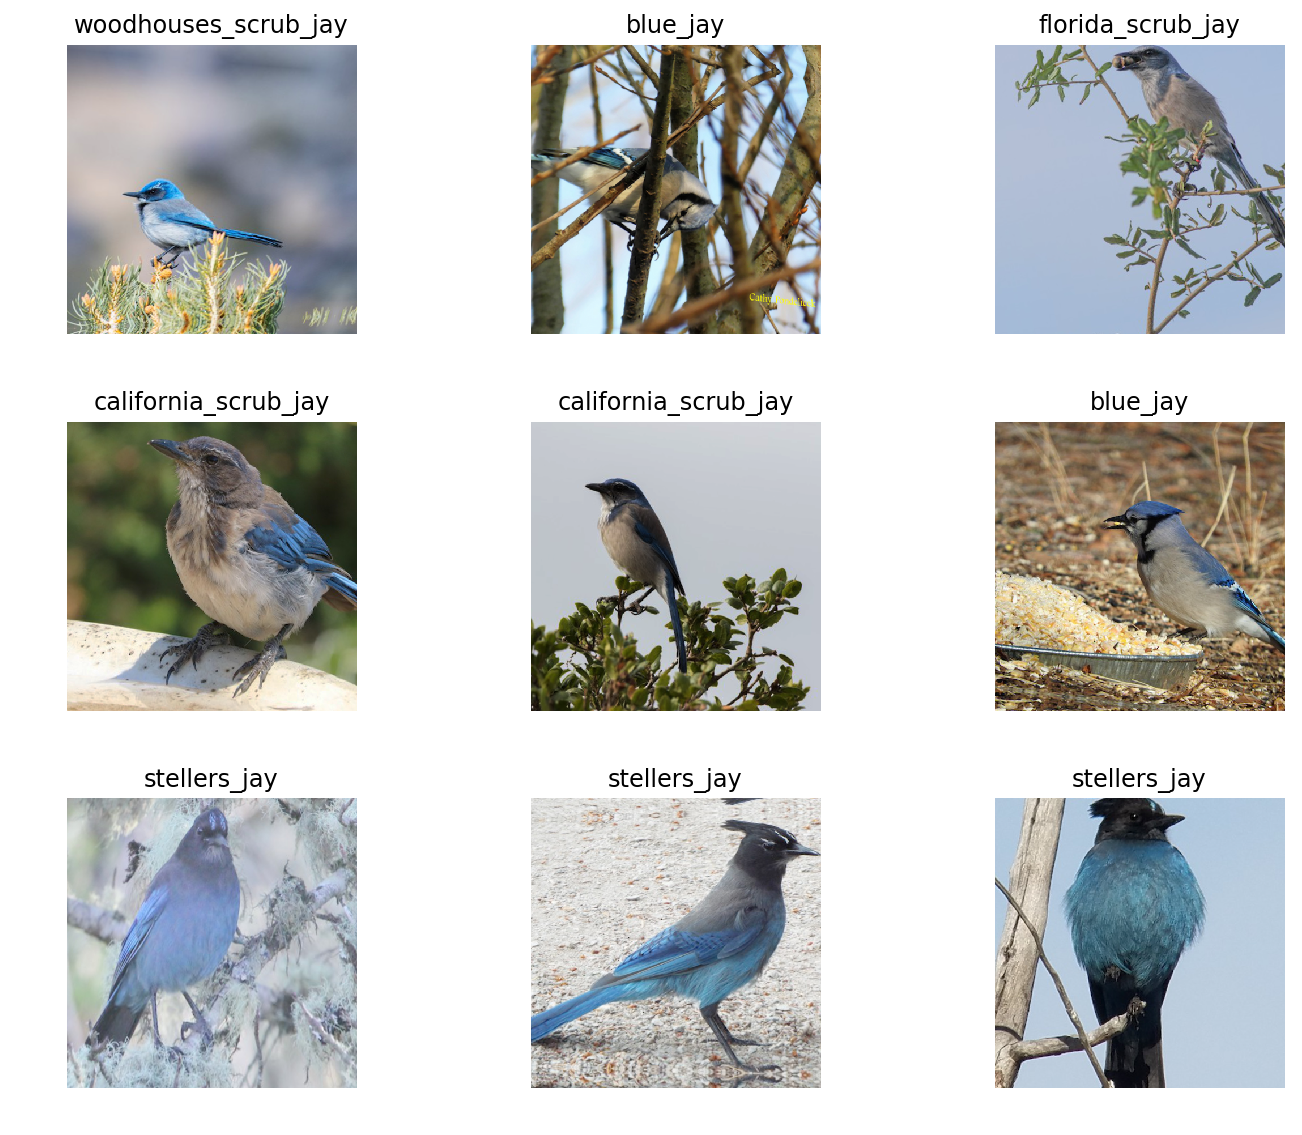

In [14]:
data.show_batch(rows=3, figsize=(10,8))

## Training with ResNet50

In [15]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

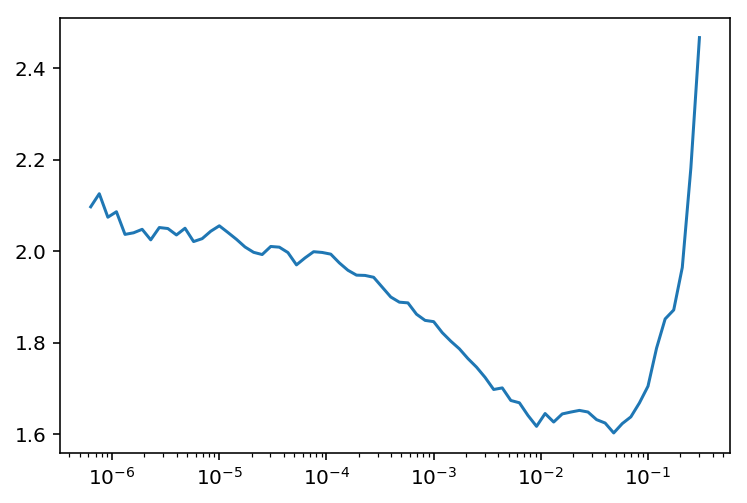

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(10, max_lr=5e-3)

Total time: 03:34
epoch  train loss  valid loss  error_rate
1      1.414081    0.808323    0.336207    (00:27)
2      0.946147    0.579358    0.206897    (00:20)
3      0.768233    0.697528    0.241379    (00:20)
4      0.727734    0.605298    0.241379    (00:21)
5      0.535436    0.372953    0.120690    (00:21)
6      0.478651    0.492601    0.198276    (00:20)
7      0.380318    0.296543    0.129310    (00:20)
8      0.286420    0.248107    0.094828    (00:20)
9      0.213584    0.229129    0.086207    (00:20)
10     0.178550    0.265463    0.094828    (00:20)



In [18]:
learn.save('resnet50_stage_1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

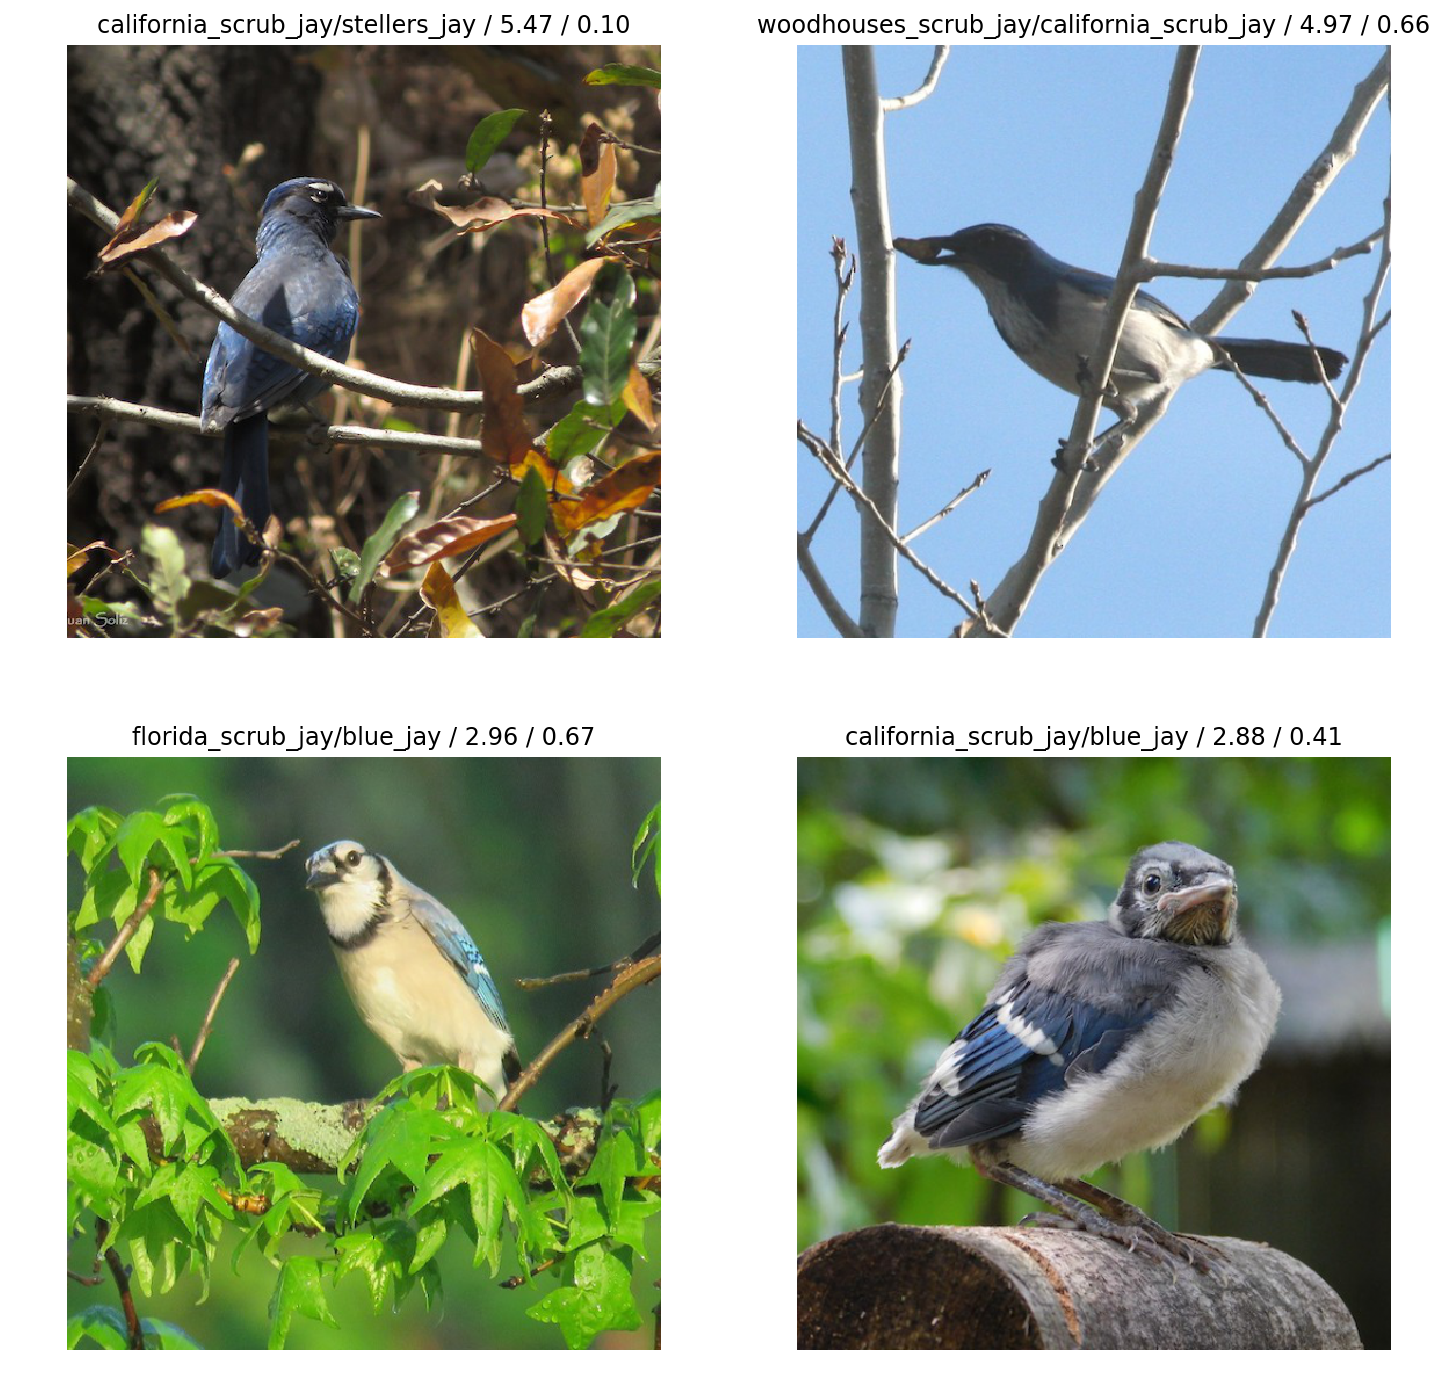

In [20]:
interp.plot_top_losses(4, figsize=(12,12))

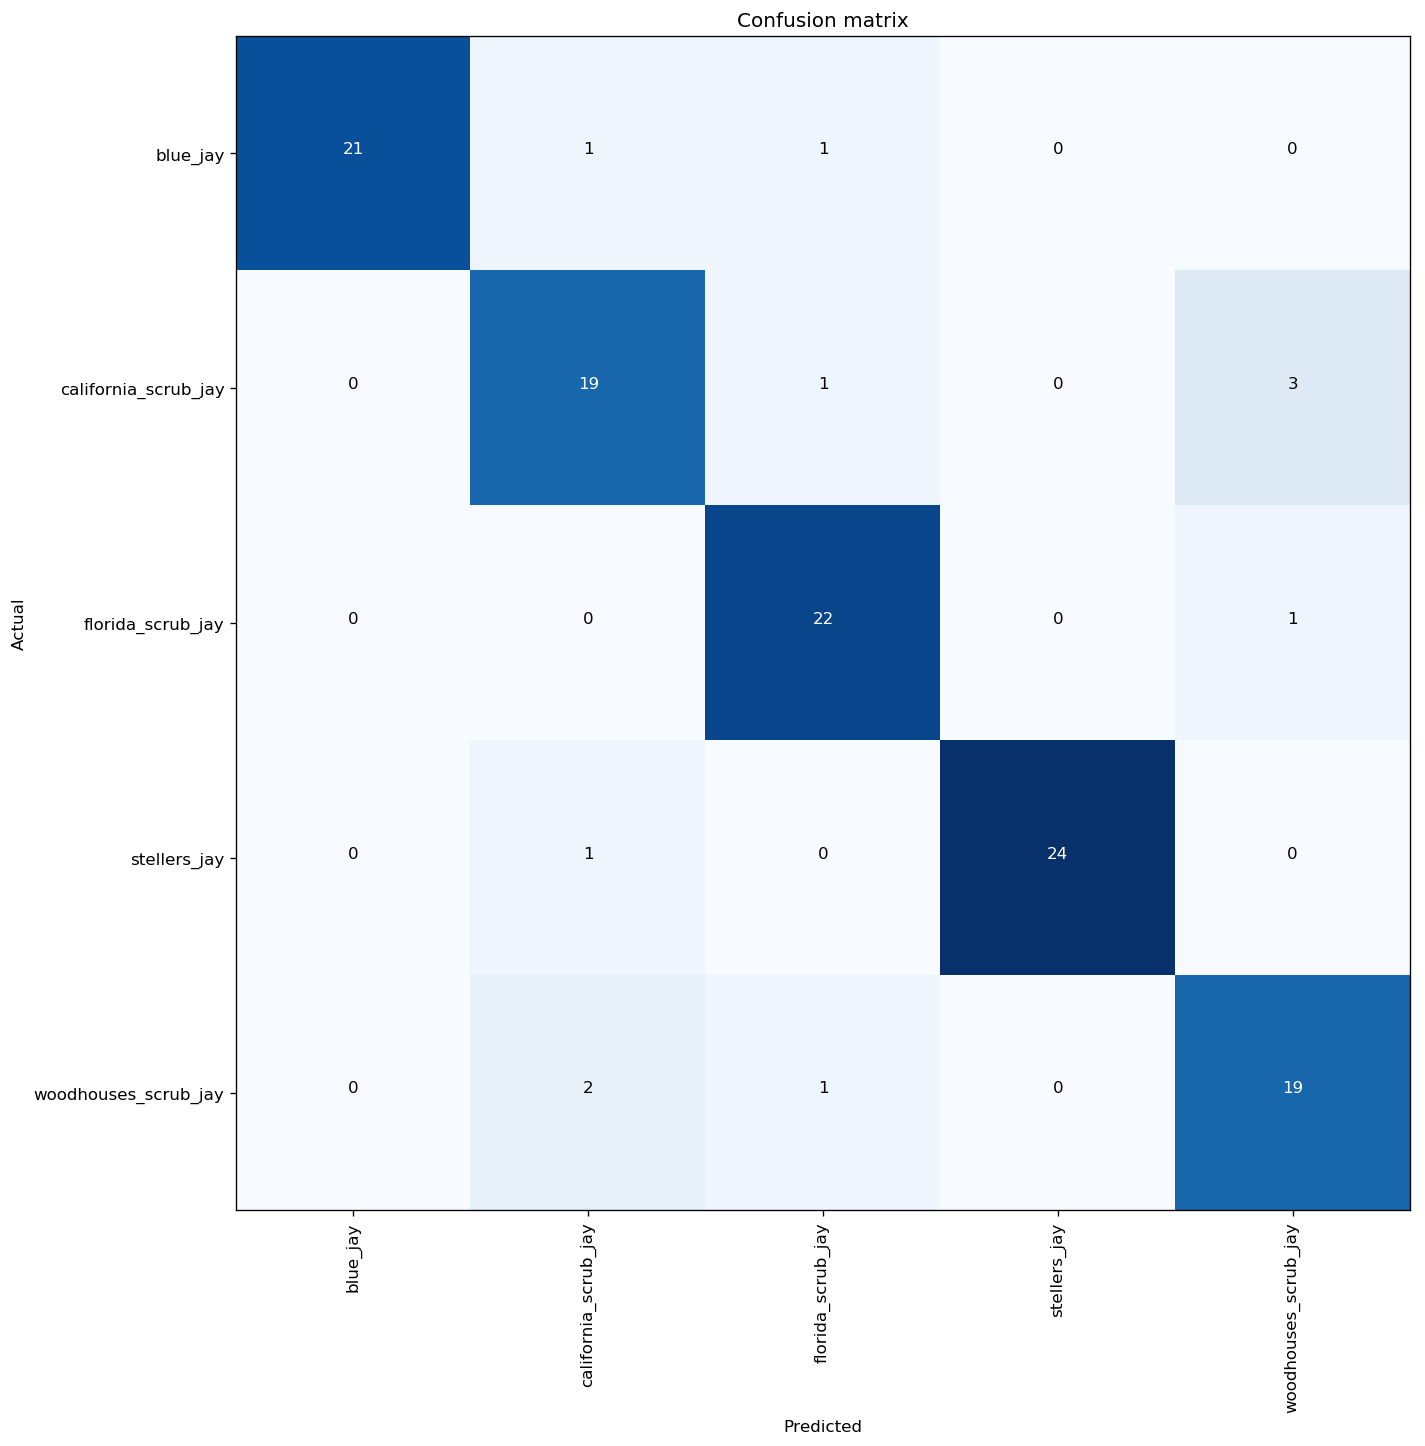

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
learn.unfreeze()

In [26]:
learn.load('resnet50_stage_1')

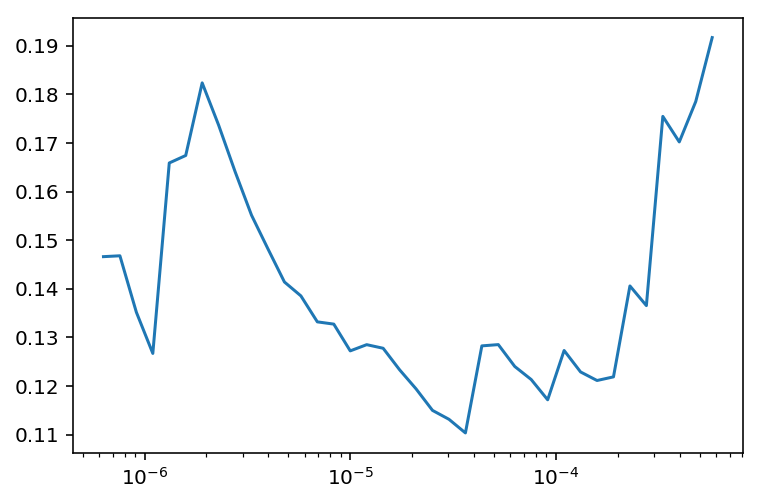

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

Total time: 04:30
epoch  train loss  valid loss  error_rate
1      0.114678    0.251403    0.094828    (00:27)
2      0.129381    0.220457    0.077586    (00:26)
3      0.140596    0.258631    0.077586    (00:26)
4      0.140338    0.216298    0.068965    (00:27)
5      0.131481    0.225522    0.068966    (00:27)
6      0.197846    0.241346    0.086207    (00:26)
7      0.178823    0.204494    0.077586    (00:27)
8      0.125211    0.222355    0.068966    (00:26)
9      0.098138    0.251950    0.094828    (00:27)
10     0.102196    0.188075    0.051724    (00:27)



In [29]:
learn.save('resnet50_stage_2')

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

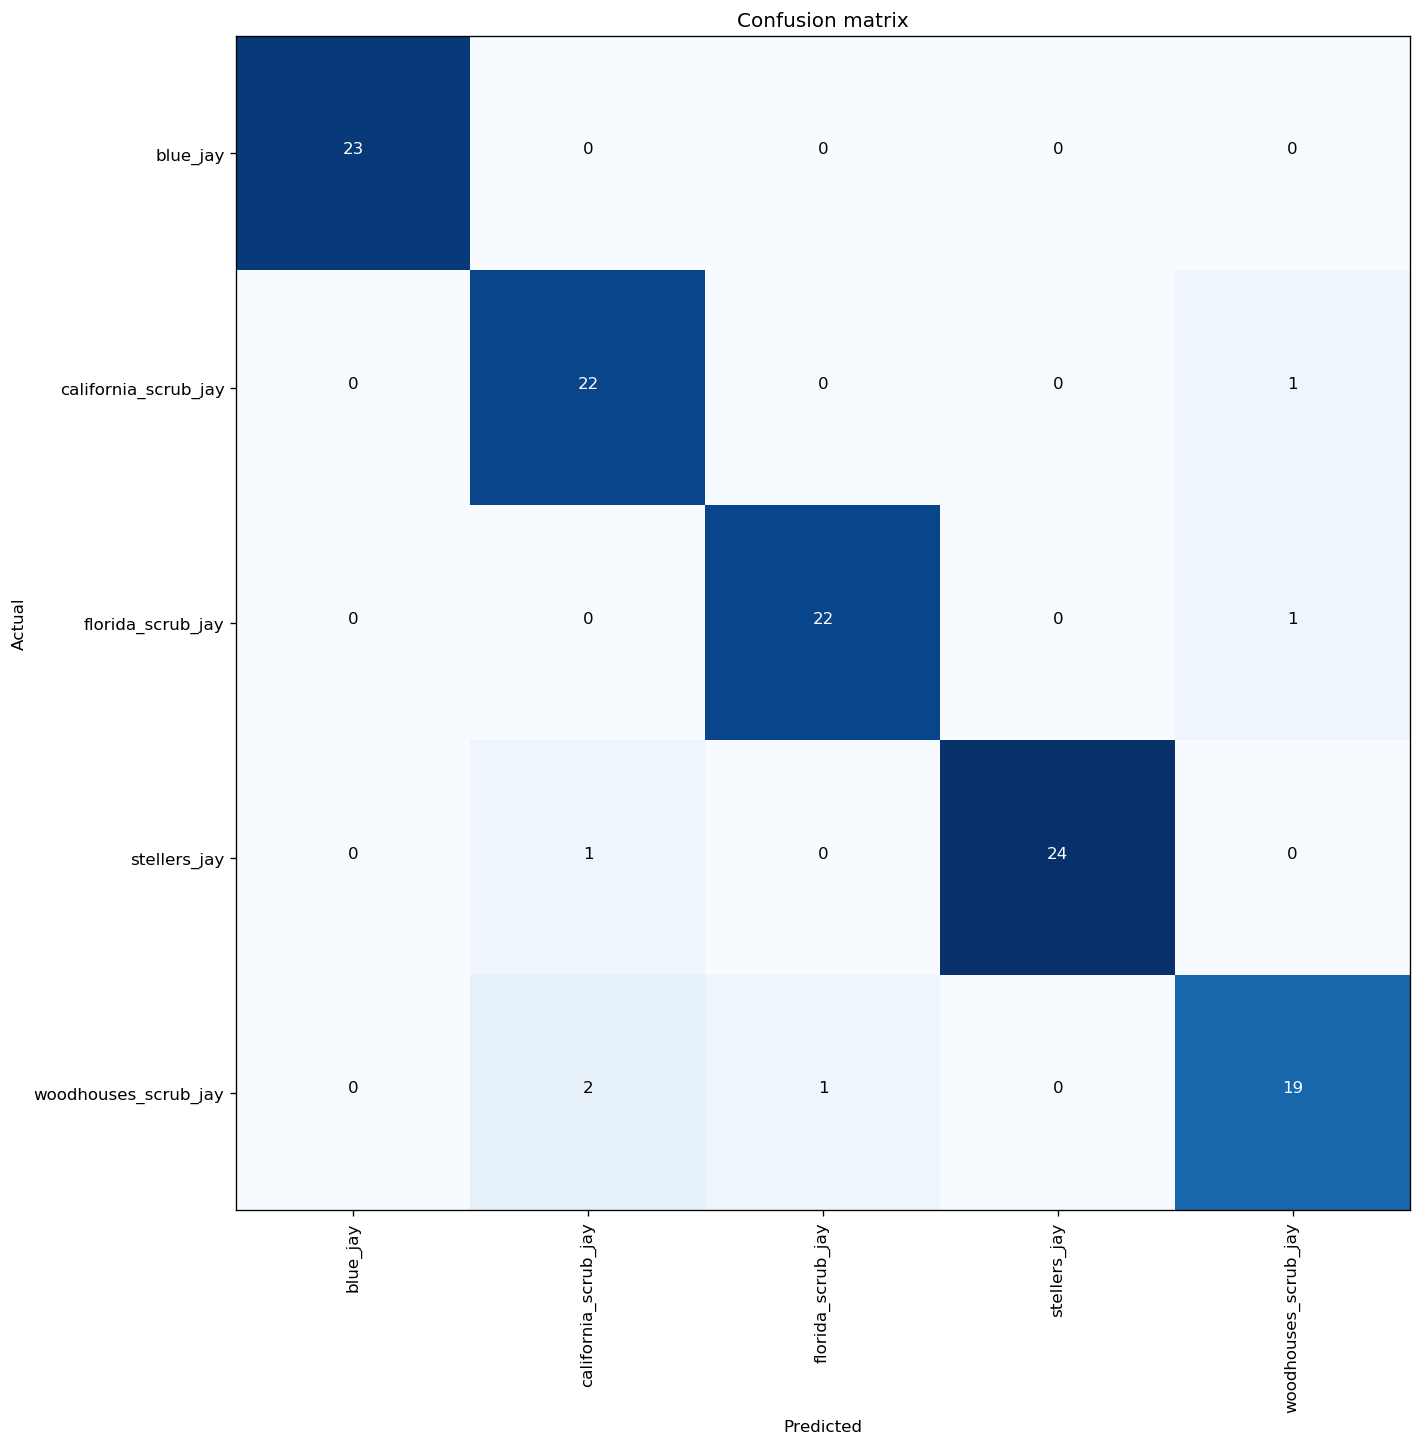

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Conclusion

After training for just 20 epochs, as well as using a dataset that consists of only 100 images of each of the five species of jays, we are able to build a model that is able to classify all images in the validation set with an error rate of only 0.05.